## The initial notebook, in which the real datasets are manipulated
##### output of this notebook used for: "GH - Create imagedata.xlsx & random products for user test"
##### excel file "humanbaseline.xlsx" is used for user test in the same notebook as above

In [1]:
import pandas as pd
import numpy as np
import urllib.request as req


The datasets (textual data and image data) are imported (real names are hidden, to not expose customer)

In [2]:
textdata = pd.read_excel('thetextfile.xlsx')
imagedata = pd.read_excel('theimagefile.xlsx', header=None)

### Drop irrelevant columns
Columns that have no added value for the classification process are dropped now

In [3]:
cols = [4,5,7,9,10,11,12,13]
textdata.drop(textdata.columns[cols], axis=1, inplace = True)

### The four-level taxonomy is now collapsed into a one-level taxonomy
This means that every only unique labels will be created, and thus classification is done based on a flat hierarchy.

In [4]:
## Change NaN (as a zero) to NaN as a word

In [5]:
textdata = textdata.fillna('nan')


In [6]:
textdata['Label'] = textdata[['Level1', 'Level2', 'Level3', 'Level4']].apply(lambda x: ';'.join(x), axis=1)


In [50]:
#This file is written for the 'human baseline' test. 
#As this is the file, from which 50 products are sampled, which will be classified. 

textdata.to_excel("textdata.xlsx")

#### Check frequency distribution of labels; see whether it is really skewed or not

In [1]:
#Some initial insights into how many unique 'nodes' there are per level of the taxonomy. 
#Due to the flattening of the hierarchy, this in itself is not relevant anymore.

print("Cat1")
print(textdata['Level1'].nunique())
print("Cat2")
print(textdata['Level2'].nunique())
print("Cat3")
print(textdata['Level3'].nunique())
print("Cat4")
print(textdata['Level4'].nunique())

In [23]:
textdata['Label'].nunique()
plottingdata = textdata.copy()

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

#Encode these classes (instead of full names, make them digits)
le = preprocessing.LabelEncoder()
le.fit(plottingdata['Label'])
plottingdata['Label'] = le.transform(plottingdata['Label']) 

The plot below shows the skewedness of the dataset, thus concluding that this dataset is imbalanced

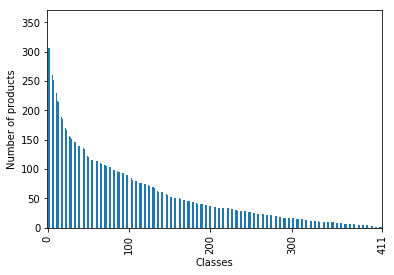

In [53]:
a = pd.value_counts(plottingdata['Label']).plot.bar()
a.axes.get_xaxis().set_ticks([])
x = [0, 100, 200, 300, 411]
my_xticks = ['0', '100', '200', '300', '411']
plt.xticks(x, my_xticks)
plt.xlabel('Classes')
plt.ylabel('Number of products')

plt.show()

## Imagedata lookup

In [477]:
imagedata.columns = ['Productnumber', 'URL']
imagedata['EditURL'] = imagedata['URL']
imagedata['EditURL'] = imagedata['EditURL'].map(lambda x: str(x)[27:])
imagedata['ProductID'] = imagedata['EditURL'].astype(str).str[0:6]


In [2]:
#imagedata

## Merge the two dataframes

In [480]:
result = pd.merge(textdata, imagedata, on='Productnumber')

In [3]:
#result

## IMAGE SCRAPER

In [456]:
from time import sleep
import random

def download_images(amount, startnumber):
    name_number = startnumber
    i=0
    j=0
    batches=0
    teller = 0


    for row in result['URL'][6177:]:

        if i < amount:
            
            imgurl = row
            req.urlretrieve(imgurl, "Images/%d.png" % (name_number))
            i += 1
            name_number += 1
            j += 1
            
            if j == 100:
                
                print('Batch of 100 downloaded')
                j = 0
                batches += 1
                print('Batch %d out of 215' % (batches))
                print('\n')
            
        else: break
            
        scrapetijd = (random.uniform(0,1) * 3)
        sleep(scrapetijd)
            
            
    return print("Downloading is finished"), name_number



#### In total there are 21459 products (and thus 21459 images)

In [458]:
download_images(21459, 1000000001)

(None, 1000006179)

## Text Classification dataframe to excel/csv

In [483]:
## FIRST PRODUCT 7415 (INDEX) IS DROPPED; AS SCRAPING SHOWED, THAT URL IS DEAD AND THUS CANNOT BE USED
result.drop(7415, inplace=True)

In [484]:
text_file = result

In [485]:
#Some additional columns are dropped, as is concluded that they add no value. 
colstext = [11,12,13]
text_file.drop(text_file.columns[colstext], axis=1, inplace = True)

In [492]:
text_file.to_excel("textdata.xlsx", index=False)

In [488]:
#A check to see if the number of products is still correct. Due to 1 dead URL, one product had to be dropped.
len(result)

21458